<a href="https://colab.research.google.com/github/NoeliaDuranL/SIS420/blob/main/Laboratorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 2 - Duran Llaveta Noelia Paola (Grupo 2)

Para la implementación de la regresión logística se usó el dataset "Phising Dataset". Este conjunto de datos ofrece información crucial para detectar y analizar dominios de phishing integrados en las URL. Abarca una amplia gama de funciones extraídas de las URL, lo que refuerza significativamente la capacidad de descubrir posibles intentos de phishing.

Énlace: https://www.kaggle.com/datasets/simaanjali/tes-upload


# Procesamiento de datos


Dado que la "y" a usar no está con 0 y 1 sino que con 0.0 y 1.0 se usó la librería pandas para procesar la "y"(en este caso la columna llamada Phising) y corregir esos valores, además de elimar todas las filas donde "Phising" sea Nan.

In [ ]:
import pandas as pd

In [ ]:
# Leer datos
df = pd.read_csv('/content/drive/MyDrive/SIS420/datasets/Phising_dataset_predict.csv', delimiter=',')

In [ ]:
# Verifica los valores únicos en la columna 'Phishing'
unique_values = df['Phising'].unique()

# Encuentra los valores que no son ni 1.0 ni 0.0
other_values = set(unique_values) - {1.0, 0.0}

if other_values:
    print("La columna 'Phising' contiene otros valores además de 1.0 y 0.0:")
    for value in other_values:
        print(value)
else:
    print("La columna 'Phising' solo contiene valores de 1.0 y 0.0.")

La columna 'Phising' contiene otros valores además de 1.0 y 0.0:
nan


In [ ]:
# Obtener la cantidad de datos no nulos en cada columna antes de eliminar NaN en 'Phising'
column_counts_before = df.count()

# Imprimir la cantidad de datos en cada columna antes de eliminar NaN en 'Phising'
print("Cantidad de datos en cada columna antes de eliminar NaN en 'Phising':")
print(column_counts_before)

Cantidad de datos en cada columna antes de eliminar NaN en 'Phising':
Unnamed: 0            662591
NumDots               662591
UrlLength             662591
AtSymbol              662591
NumDash               662591
NumPercent            662591
NumQueryComponents    662591
IpAddress             662591
HttpsInHostname       662591
PathLevel             662591
PathLength            662591
NumNumericChars       662591
Phising               630071
dtype: int64


In [ ]:
# Eliminar las filas donde 'Phising' es NaN
df_cleaned = df.dropna(subset=['Phising'])

# Verificar si quedan valores NaN en el DataFrame limpio
print("Número de valores NaN después de eliminar:", df_cleaned['Phising'].isna().sum())


Número de valores NaN después de eliminar: 0


In [ ]:
# Obtener la cantidad de datos no nulos en cada columna después de eliminar NaN en 'Phising'
column_counts_after = df_cleaned.count()

# Imprimir la cantidad de datos en cada columna después de eliminar NaN en 'Phising'
print("Cantidad de datos en cada columna después de eliminar NaN en 'Phising':")
print(column_counts_after)


Cantidad de datos en cada columna después de eliminar NaN en 'Phising':
Unnamed: 0            630071
NumDots               630071
UrlLength             630071
AtSymbol              630071
NumDash               630071
NumPercent            630071
NumQueryComponents    630071
IpAddress             630071
HttpsInHostname       630071
PathLevel             630071
PathLength            630071
NumNumericChars       630071
Phising               630071
dtype: int64


In [ ]:
# Convertir 1.0 a 1 y 0.0 a 0 en la columna 'Phising'
df_cleaned['Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})

# Verificar los valores únicos después de la conversión
print("Valores únicos en la columna 'Phising' después de la conversión:")
print(df_cleaned['Phising'].unique())

Valores únicos en la columna 'Phising' después de la conversión:
[1. 0.]


<ipython-input-155-7583e64c72d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})


In [ ]:
# Convertir 1.0 a 1 y 0.0 a 0 en la columna 'Phising'
df_cleaned.loc[:, 'Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})

# Verificar los valores únicos después de la conversión
print("Valores únicos en la columna 'Phising' después de la conversión:")
print(df_cleaned['Phising'].unique())

Valores únicos en la columna 'Phising' después de la conversión:
[1. 0.]


<ipython-input-156-dd4728147ffd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})


In [ ]:
# Imprimir las primeras filas del DataFrame
print(df_cleaned.head())

   Unnamed: 0  NumDots  UrlLength  AtSymbol  NumDash  NumPercent  \
0           0        3         72         0        0           0   
1           1        3        144         0        0           0   
2           2        3         58         0        0           0   
3           3        3         79         0        1           0   
4           4        3         46         0        0           0   

   NumQueryComponents  IpAddress  HttpsInHostname  PathLevel  PathLength  \
0                   0          0                0          5          44   
1                   2          0                0          3          16   
2                   0          0                0          2          24   
3                   0          0                0          6          50   
4                   0          0                0          4          29   

   NumNumericChars  Phising  
0                0      1.0  
1               41      1.0  
2                0      1.0  
3             

In [ ]:
# Convertir 1.0 a 1 y 0.0 a 0 en la columna 'Phising' directamente en el DataFrame original
df['Phising'].replace({1.0: 1, 0.0: 0}, inplace=True)

# Verificar los valores únicos después de la conversión
print("Valores únicos en la columna 'Phising' después de la conversión:")
print(df['Phising'].unique())

Valores únicos en la columna 'Phising' después de la conversión:
[ 1.  0. nan]


In [ ]:
# Imprimir las primeras filas del DataFrame
print(df_cleaned.head())

   Unnamed: 0  NumDots  UrlLength  AtSymbol  NumDash  NumPercent  \
0           0        3         72         0        0           0   
1           1        3        144         0        0           0   
2           2        3         58         0        0           0   
3           3        3         79         0        1           0   
4           4        3         46         0        0           0   

   NumQueryComponents  IpAddress  HttpsInHostname  PathLevel  PathLength  \
0                   0          0                0          5          44   
1                   2          0                0          3          16   
2                   0          0                0          2          24   
3                   0          0                0          6          50   
4                   0          0                0          4          29   

   NumNumericChars  Phising  
0                0      1.0  
1               41      1.0  
2                0      1.0  
3             

In [ ]:
print(df['Phising'])

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
662586    1.0
662587    1.0
662588    1.0
662589    1.0
662590    1.0
Name: Phising, Length: 662591, dtype: float64


In [ ]:
# Eliminar valores NaN de la columna 'Phising'
df_cleaned = df.dropna(subset=['Phising'])

# Convertir 1.0 a 1 y 0.0 a 0 en la columna 'Phising'
df_cleaned['Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})

# Cambiar el tipo de datos de la columna 'Phising' a entero
df_cleaned['Phising'] = df_cleaned['Phising'].astype(int)

# Imprimir la columna 'Phising' después de la conversión
print(df_cleaned['Phising'])


0         1
1         1
2         1
3         1
4         1
         ..
662586    1
662587    1
662588    1
662589    1
662590    1
Name: Phising, Length: 630071, dtype: int64


<ipython-input-161-1cd874edd6b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Phising'] = df_cleaned['Phising'].replace({1.0: 1, 0.0: 0})
<ipython-input-161-1cd874edd6b2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Phising'] = df_cleaned['Phising'].astype(int)


In [ ]:
print(df_cleaned['Phising'])

0         1
1         1
2         1
3         1
4         1
         ..
662586    1
662587    1
662588    1
662589    1
662590    1
Name: Phising, Length: 630071, dtype: int64


Una vez procesados los datos tenemos un nuevo dataframe llamado df_cleaned que se usará para la aplicación de la regresión logistica. En este dataframe se usan solo 9 X.

X = 'NumDots', 'UrlLength', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'PathLevel', 'PathLength', 'NumNumericChars'

y = 'Phising'

# Librerias usadas para regresión logistica

In [ ]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

from tabulate import tabulate

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# Visualización de datos

No se usan todas las columnas del dataset pues no son relevantes, solo se usan 9 y para "y" se usa la columna Phising. Además se usa el 80% del dataset para entrenar y 20% para testear.

In [ ]:
# columnas relevantes para X
features = ['NumDots', 'UrlLength', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'PathLevel', 'PathLength', 'NumNumericChars']
X = df_cleaned[features].values

# Phising' para y
y = df_cleaned['Phising'].values

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(0.8 * len(df_cleaned))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Asignar X_train y y_train a X y y respectivamente
X = X_train
y = y_train
m_train = len(y_train)

# Imprimir los datos de entrenamiento y prueba
print("Datos de entrenamiento:")
print(X_train)
print(y_train)
print("Datos de prueba:")
print(X_test)
print(y_test)

Datos de entrenamiento:
[[  3  72   0 ...   5  44   0]
 [  3 144   0 ...   3  16  41]
 [  3  58   0 ...   2  24   0]
 ...
 [  4 104   0 ...   1  10   1]
 [  2 195   0 ...   1  10   1]
 [  3 101   0 ...   1  11   1]]
[1 1 1 ... 0 0 0]
Datos de prueba:
[[ 1 36  0 ...  4 36  1]
 [ 2 66  0 ...  5 66  1]
 [ 3 45  0 ...  3 45  0]
 ...
 [ 2 42  0 ...  4 42  1]
 [ 2 45  0 ...  3 45  0]
 [ 2 41  0 ...  3 41  0]]
[0 0 0 ... 1 1 1]


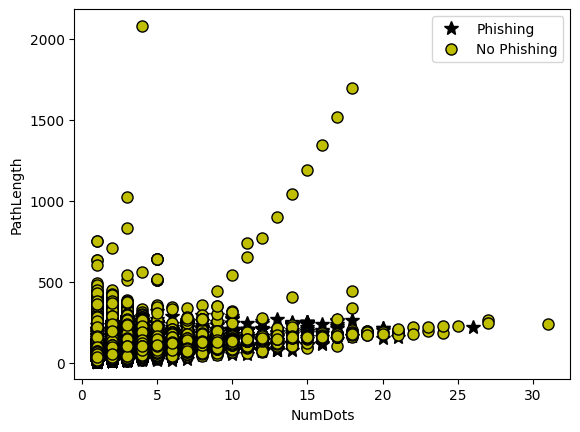

In [ ]:
def plotData(X, y):
    # Grafica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Encuentra los índices de ejemplos positivos y negativos
    pos = y == 1
    neg = y == 0

    # Grafica ejemplos positivos
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10, label='Phishing')

    # Grafica ejemplos negativos
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1, label='No Phishing')

    # Etiqueta los ejes
    pyplot.xlabel('NumDots')
    pyplot.ylabel('PathLength')

    # Agrega una leyenda
    pyplot.legend()

    # Muestra la gráfica
    pyplot.show()

# Llama a la función para visualizar los datos
plotData(X, y)



# Normalización de características

Los datos de las X están en diferente escalas y deben ser normalizadas

In [ ]:
def featureNormalize(X):
    # Hace una copia de X
    X_norm = X.copy()

    # Inicializa mu y sigma con ceros
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calcula la media y la desviación estándar de cada característica
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    sigma[sigma == 0] = 1

    # Normaliza cada característica
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [ ]:
# Llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

# imprimir todas las X_norm de datos solo 10 ejemplos
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]'
))
print('-' * 85)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8]
-------------------------------------------------------------------------------------
   0.899   0.333    -0.027    -0.561  -0.096  -0.497   1.445   0.120  -0.414
   0.899   2.185    -0.027    -0.561  -0.096   3.817   0.166  -0.887  24.960
   0.899  -0.027    -0.027    -0.561  -0.096  -0.497  -0.473  -0.599  -0.414
   0.899   0.513    -0.027    -0.250  -0.096  -0.497   2.085   0.335  -0.414
   0.899  -0.336    -0.027    -0.561  -0.096  -0.497   0.806  -0.420   0.824
   0.899  -0.439    -0.027    -0.250  -0.096  -0.497  -1.113  -1.031  -0.414
   0.037   0.024    -0.027    -0.561  -0.096  -0.497   1.445  -0.168   0.205
  -0.825  -0.748    -0.027    -0.561  -0.096  -0.497   0.166  -1.067   1.442
   5.208   0.436    -0.027    -0.250  -0.096  -0.497  -0.473  -1.318   0.824
   0.037  -0.336    -0.027    -0.561  -0.096  -0.497  -0.473  -0.563  -0.414


In [ ]:
# Concatenar una columna de unos al inicio de X_norm
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# Imprimir los nombres de las características
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]'
))
print('-' * 130)

# Imprimir solo 10 ejemplos de X_norm
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8] X[:, 9]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   0.899     0.333    -0.027  -0.561  -0.096  -0.497   1.445   0.120  -0.414
   1.000   0.899     2.185    -0.027  -0.561  -0.096   3.817   0.166  -0.887  24.960
   1.000   0.899    -0.027    -0.027  -0.561  -0.096  -0.497  -0.473  -0.599  -0.414
   1.000   0.899     0.513    -0.027  -0.250  -0.096  -0.497   2.085   0.335  -0.414
   1.000   0.899    -0.336    -0.027  -0.561  -0.096  -0.497   0.806  -0.420   0.824
   1.000   0.899    -0.439    -0.027  -0.250  -0.096  -0.497  -1.113  -1.031  -0.414
   1.000   0.037     0.024    -0.027  -0.561  -0.096  -0.497   1.445  -0.168   0.205
   1.000  -0.825    -0.748    -0.027  -0.561  -0.096  -0.497   0.166  -1.067   1.442
   1.000   5.208     0.436    -0.027  -0.250  -0.096  -0.497  -0.473  -1.318   0.824
   1.000   0.037   

# Función Sigmoidea

In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # Convierte la entrada a un arreglo numpy
    z = np.array(z)

    # Inicializa un arreglo de ceros con la misma forma que z
    g = np.zeros(z.shape)

    # Calcula la sigmoide
    g = 1 / (1 + np.exp(-z))

    return g

# Prueba la implementación de la función sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)


g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


# Cálculo de costo

In [ ]:

def calcularCosto(theta, X, y):
    # Inicializar algunos valores útiles
    m = y.size  # número de ejemplos de entrenamiento

    J = 0

    # Calcula la función de costo J
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

# Descenso por el gradiente

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0]  # número de ejemplos de entrenamiento

    # Realiza una copia de theta, el cual será actualizado por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        # Calcula la función de costo y el gradiente
        h = sigmoid(X.dot(theta))

        theta = theta - (alpha / m) * (h - y).dot(X)

        # Guarda el costo en cada iteración
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history


In [ ]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(len(X_ready[0]))



# Convergencia de costo

In [ ]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite = 900
alpha = 0.009

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")


########################################################################################################
Los valores de theta calculados son:
theta 1: -1.6438318107378433
theta 2: 0.13369089939698003
theta 3: -0.07783081982261811
theta 4: 0.004013676194294513
theta 5: -0.07355323717043594
theta 6: -0.002776476617401119
theta 7: -0.1415711355964048
theta 8: -0.16238196467266053
theta 9: -0.08986061172483063
theta 10: 0.11957774126105035
########################################################################################################
con un costo de: 0.2789857158555175 


Text(0, 0.5, 'Costo J')

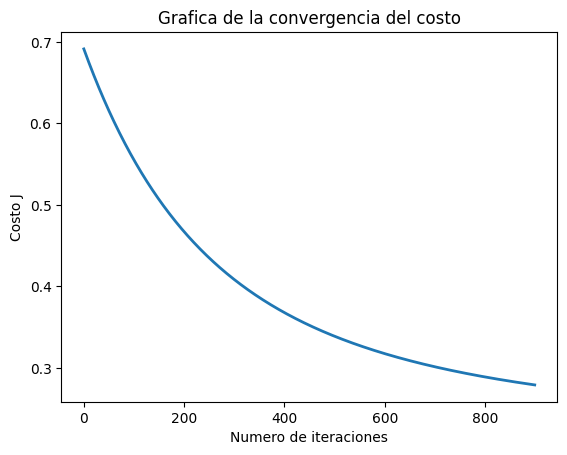

In [ ]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [ ]:
print(df_cleaned.tail())

        Unnamed: 0  NumDots  UrlLength  AtSymbol  NumDash  NumPercent  \
662586      662586        3         39         0        0           0   
662587      662587        2         44         0        2           0   
662588      662588        2         42         0        0           0   
662589      662589        2         45         0        0           0   
662590      662590        2         41         0        0           0   

        NumQueryComponents  IpAddress  HttpsInHostname  PathLevel  PathLength  \
662586                   0          0                0          4          39   
662587                   0          0                0          4          44   
662588                   0          0                0          4          42   
662589                   0          0                0          3          45   
662590                   0          0                0          3          41   

        NumNumericChars  Phising  
662586                1        1  
6625

In [ ]:
X_array = [1, 3, 39, 0, 0, 0, 0, 4, 39, 1]  # Datos del ejemplo
X_array_copy = X_array.copy()

# Normalizar todas las características, excepto el término de intercepción, para la prueba utilizando mu y sigma calculados anteriormente
X_array[1:] = (X_array[1:] - mu) / sigma

# Calcular la probabilidad utilizando la función sigmoid y los parámetros theta
resultados = sigmoid(np.dot(X_array, theta))

# Imprimir los resultados
print(f"Un ejemplo con las características: {X_array_copy}")
print(f'Tiene una probabilidad de ser phishing de: {resultados * 100:.2f} %')
print(f"Con valores de theta: {theta}")

Un ejemplo con las características: [1, 3, 39, 0, 0, 0, 0, 4, 39, 1]
Tiene una probabilidad de ser phishing de: 18.65 %
Con valores de theta: [-1.64383181  0.1336909  -0.07783082  0.00401368 -0.07355324 -0.00277648
 -0.14157114 -0.16238196 -0.08986061  0.11957774]


In [ ]:
nombres_columnas = [ 'NumDots', 'UrlLength', 'AtSymbol', 'NumDash', 'NumPercent', 'NumQueryComponents', 'PathLevel', 'PathLength', 'NumNumericChars','Phising', 'Phising(Si/No)']

matriz_datos = np.array([
[3,72,0,0,0,0,5,44,0],
[3,144,0,0,0,2,3,16,41],
[3,58,0,0,0,0,2,24,0],
[3,79,0,1,0,0,6,50,0],
[3,46,0,0,0,0,4,29,2],

[2,150,1,0,0,0,6,42,56],
[9,45,0,0,0,3,10,32,0],
[8,78,2,1,0,0,5,96,1],
[1,80,0,0,1,0,2,50,9],
[0,99,1,0,0,0,1,74,6],
])

para_tabla = matriz_datos.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre = []

matriz_datos = (matriz_datos- mu) / sigma
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos:
    y_pre.append(sigmoid(np.dot(j, theta)))

# Convertimos la lista a un array unidimensional

y_pre = np.array(y_pre)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral = (y_pre >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre))
para_tabla = np.column_stack((para_tabla, y_pre_umbral))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-----------+-------------+------------+-----------+--------------+----------------------+-------------+--------------+-------------------+-----------+------------------+
|   NumDots |   UrlLength |   AtSymbol |   NumDash |   NumPercent |   NumQueryComponents |   PathLevel |   PathLength |   NumNumericChars |   Phising |   Phising(Si/No) |
+===========+=============+============+===========+==============+======================+=============+==============+===================+===========+==================+
|         3 |          72 |          0 |         0 |            0 |                    0 |           5 |           44 |                 0 | 0.150225  |                0 |
+-----------+-------------+------------+-----------+--------------+----------------------+-------------+--------------+-------------------+-----------+------------------+
|         3 |         144 |          0 |         0 |            0 |                    2 |           3 |           16 |                41 | 0.699

In [ ]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

In [ ]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)
# Imprimir los valores de las características de los datos, mostrando solo 10 ejemplos
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]'
))
print('-' * 88)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4],
        X_test_ready[i, 5], X_test_ready[i, 6], X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9]
    ))



  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8]   X[:, 9]
----------------------------------------------------------------------------------------
   1.000  -0.825    -0.593    -0.027  -0.250  -0.096  -0.497   0.806  -0.168     0.205
   1.000   0.037     0.178    -0.027   0.372  -0.096  -0.497   1.445   0.910     0.205
   1.000   0.899    -0.362    -0.027   0.061  -0.096  -0.497   0.166   0.155    -0.414
   1.000   0.037    -1.082    -0.027  -0.561  -0.096  -0.497  -1.113  -0.851    -0.414
   1.000  -0.825    -1.134    -0.027  -0.561  -0.096  -0.497  -1.113  -0.923    -0.414
   1.000  -0.825     0.642    -0.027   0.994  -0.096  -0.497   1.445   1.557     0.205
   1.000  -0.825    -0.722    -0.027  -0.561  -0.096   1.660  -0.473  -0.851     0.205
   1.000   0.037     0.204    -0.027   0.372  -0.096  -0.497  -0.473   0.946     0.205
   1.000  -0.825    -0.979    -0.027  -0.561  -0.096  -0.497  -1.113  -0.707    -0.414
   1.000  -0.825    -0.722    -0.027  -0.

In [ ]:
# Inicializar lista para las predicciones
y_predicha = []

# Calcular la Y predicha para cada fila de la matriz de datos de prueba
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertir la lista en un array unidimensional
y_predicha = np.array(y_predicha)

# Usar un umbral donde todo lo que sea >= 0.5 será 1 y < 0.5 será 0
y_umbral = (y_predicha >= 0.5).astype(int)

# Imprimir los nombres de las características y las predicciones usando el umbral
# Imprimir los nombres de las características y las predicciones usando el umbral
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'Y_predicha'
))

print('-' * 100)

# Mostrar algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5],
        X_test_ready[i, 6], X_test_ready[i, 7], X_test_ready[i, 8], y_umbral[i]
    ))



  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]Y_predicha
----------------------------------------------------------------------------------------------------
   1.000  -0.825    -0.593    -0.027  -0.250  -0.096  -0.497   0.806  -0.168   0.000
   1.000   0.037     0.178    -0.027   0.372  -0.096  -0.497   1.445   0.910   0.000
   1.000   0.899    -0.362    -0.027   0.061  -0.096  -0.497   0.166   0.155   0.000
   1.000   0.037    -1.082    -0.027  -0.561  -0.096  -0.497  -1.113  -0.851   0.000
   1.000  -0.825    -1.134    -0.027  -0.561  -0.096  -0.497  -1.113  -0.923   0.000
   1.000  -0.825     0.642    -0.027   0.994  -0.096  -0.497   1.445   1.557   0.000
   1.000  -0.825    -0.722    -0.027  -0.561  -0.096   1.660  -0.473  -0.851   0.000
   1.000   0.037     0.204    -0.027   0.372  -0.096  -0.497  -0.473   0.946   0.000
   1.000  -0.825    -0.979    -0.027  -0.561  -0.096  -0.497  -1.113  -0.707   0.000
   1.000  -0.825    -0.722    -0.027  -0.561  -0.096   

In [ ]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 49.25 %
